# SENTIMENT ANALYSIS



In [1]:
#Release: 1.2010.0901

# Library

For this lab, we will need ``wordcloud`` library.
Use pip to install the library from Anaconda prompt : ``pip install wordcloud``.

In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

from subprocess import check_output

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Read Data

In [3]:
!mkdir -p dataset
!wget https://raw.githubusercontent.com/project303/dataset/master/Twitter.csv -P dataset

--2020-10-08 17:43:42--  https://raw.githubusercontent.com/project303/dataset/master/Twitter.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413468 (404K) [text/plain]
Saving to: ‘dataset/Twitter.csv’

Twitter.csv         100%[===================>] 403.78K  --.-KB/s    in 0.07s   

2020-10-08 17:43:43 (5.48 MB/s) - ‘dataset/Twitter.csv’ saved [413468/413468]



In [4]:
!ls dataset

Twitter.csv


In [5]:
data = pd.read_csv('dataset/Twitter.csv', sep='|')
# Choose the column we will be using
data = data[['text','sentiment']]
len(data)

4294

In [6]:
data[:10]

,text,sentiment
0,@IndosatCare iya nomernya masih itu. Mksh.,Positif
1,@IndosatCare udah di DM yah,Positif
2,@Telkomsel aku pakai loop kak :),Positif
3,@rikawidjaya04 Terima kasih juga Kak Rika atas...,Positif
4,@ndusell saya simpati tan,Positif
5,@telkomsel terima kasih penjelasannya mimin,Positif
6,"@indosatcare terima kasih ya, untuk informasinya.",Positif
7,@Telkomsel yess yess,Positif
8,@Telkomsel ok thanks,Positif
9,thanks @IndosatCare koneksi internet sudah nor...,Positif


In [7]:
# Bagi dataset menjadi data training dan testing
train, test = train_test_split(data,test_size = 0.2)
# Hapus sentiment yang netral
train = train[train.sentiment != "Neutral"]

train_pos = train[ train['sentiment'] == 'Positif']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negatif']
train_neg = train_neg['text']

In [8]:
train_pos

3505    indonesia Kerap Terjadi Pencurian Ikan  Begini...
3495    Alasan Kemenhan Ingin Bentuk Badan Intelejen P...
3527    Dan Indonesia tidak sendiri jika perang itu te...
4224    Menhan Sebut Markas Besar Kelompok Abu Sayyaf ...
4275    KSAD Bebaskan Sandera Abu Sayyaf, Kopassus dan...
                              ...                        
3076    Menhan  satelit militer harus rahasia  Menteri...
3493    Menteri Pertahanan Indonesia  Ryamizard Ryacud...
2945       Kemenhan dan TNI Harus Uji Kembali Alutsista  
1726    @IndosatCare oke, makasih ya informasinya... S...
3519    Titip salam ke kemenhan  kalau mau damai ada d...
Name: text, Length: 1089, dtype: object

In [9]:
train_neg

997                @IndosatCare dm saya belum ad kabar ya
1517    @Telkomsel tipe hp Asus Zenfone 2, lokasi di C...
4046       Penyelamatan WNI Terkendala, Dua Sandera Sakit
1534    @Telkomsel min di paket sosial max itu gratis ...
1428    @IndosatCare, kok belum dapat ya? https://t.co...
                              ...                        
1899    @Telkomsel maaf mas, kenapa gagal akses twitte...
2009    DAHULU begini Sekarang Tuh cek program bela ne...
3666                    Patroli Trilateral sudah Mendesak
3982    Markas Abu Sayyaf di Basilan, Dibersihkan Mi...
1994    Pendidikan Bela Negara buat ormas di Bali terk...
Name: text, Length: 1018, dtype: object

In [10]:
#augment the stopwords with nonstandard twitter words
stopwords_set = set(stopwords.words("indonesian"))
stopwords_aug = {"ya","yak","iya","yg","ga","gak","gk","udh","sdh","udah","dah","nih","ini","deh","sih","dong","donk",
                 "sm","knp","utk","yaa","tdk","gini","gitu","bgt","gt","nya","kalo","cb","jg","jgn","gw","ge",
                 "sy","min","mas","mba","mbak","pak","kak","trus","trs","bs","bisa","aja","saja","no",
                 "w","g","gua","gue","emang","emg","wkwk","dr","kau","dg","gimana","apapun","apa",
                 "klo","yah","banget","pake","terus","krn","jadi","jd","mu","ku","si","hehe",
                 "tp","pa","lu","lo","lw","tw","tau","karna","kayak","ky","lg","untuk","tuk","dg","dgn"}
stopwords_all = stopwords_set.union(stopwords_aug)

In [ ]:
#stopwords_set

Positive words


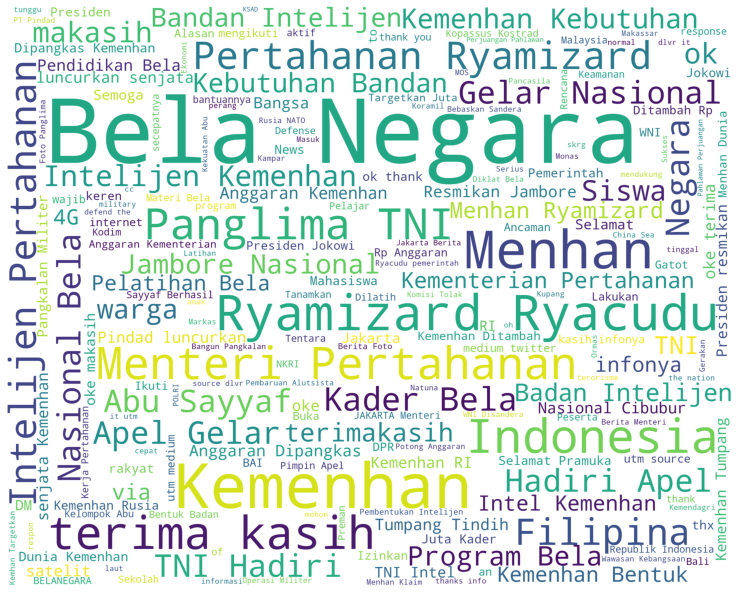

Negative words


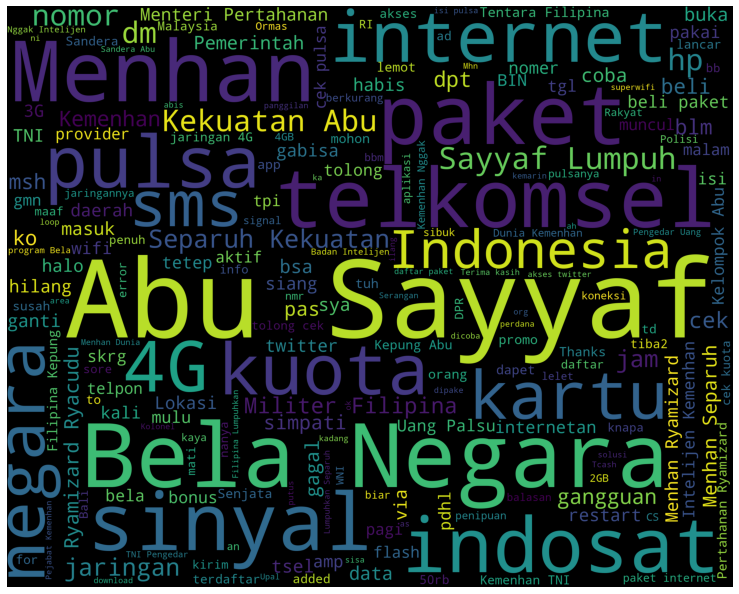

In [11]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords_all,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [13]:
tweets = []
#stopwords_set = set(stopwords.words("indonesia"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_all]
    tweets.append((words_cleaned,row.sentiment))

test_pos = test[ test['sentiment'] == 'Positif']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negatif']
test_neg = test_neg['text']

In [14]:
test_pos

4268      Indonesia, Cambodia discuss defence cooperation
4225    Menhan Gantikan Jokowi Pimpin Apel Nasional Be...
3915    Indonesia dan Vietnam Kerja Sama Bidang Pertah...
3892       Jokowi Resmikan Jambore Nasional IX di Cibubur
2824              Bela Negara Tidak Harus Angkat Senjata 
                              ...                        
3154    Ribuan Siswa Baru SMP Dan SMA SMK Se Kota Maka...
3198                     Bangkitkan Semangat Bela Negara 
3270    Menhan Hapus Ospek di Sekolah dengan Bela Negara 
126     @IndosatCare oke makasih. Oh ya utk bonusnya b...
2921    Radio ANDIKA       Menteri Pertahanan Ryamizar...
Name: text, Length: 256, dtype: object

In [15]:
test_neg

1504    aplikasi my telkomsel yang baru gak bisa liat ...
2093    Masinton Pembentukan Intelijen Kemenhan Absurd...
1299    @Telkomsel saya pake telpon; malah kena tagiha...
3629    Pemerintah Indonesia Memperburuk Situasi Terha...
1917    @Telkomsel masih gak bisa sms dan melakukan pa...
                              ...                        
2094      Masinton Pembentukan Intelijen Kemenhan Absurd 
1148    @IndosatCare tolong no ini 085642459050 kok bu...
3653    TNI Tunggu Filipina dan Malaysia Gempur Abu Sa...
1308    Mslh sinyal @Telkomsel ini ga slse2.pdhl di hp...
4025    Negara Kewalahan Lawan Perompak Jika Kukuh Pad...
Name: text, Length: 253, dtype: object

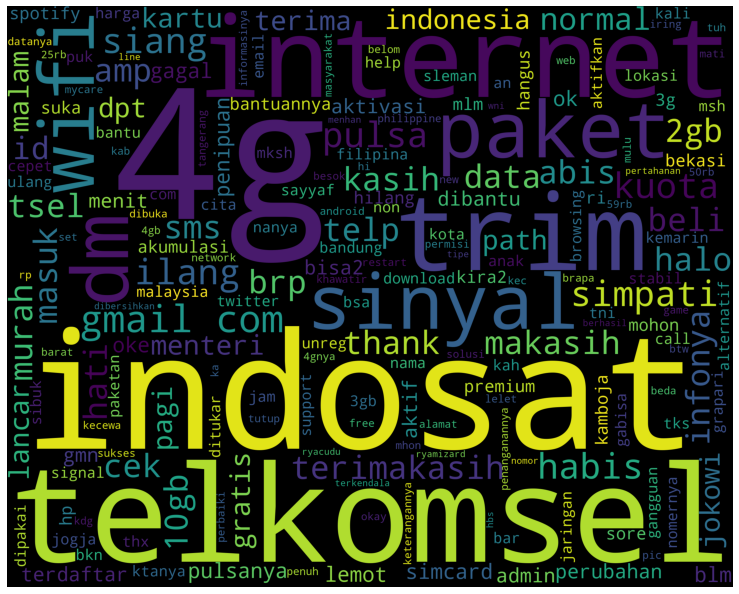

['@Telkomsel', 'saya', 'pake', 'telpon;', 'malah', 'kena', 'tagihan.', 'coba', 'pindah', 'ke', 'prabayar;', 'bonusnya', 'hilang.', 'balik', 'ke', 'pasca;ada', 'tapi', 'gak', 'bisa', 'dipake.']
['@Telkomsel', 'masih', 'gak', 'bisa', 'sms', 'dan', 'melakukan', 'panggilan.', 'Dan', 'gak', 'bisa', 'kirim', 'DM.', 'No', 'nya.', '081322137668.']
['@IndosatCare', 'apakah', 'ada', 'gangguan', 'pada', 'koneksi', 'internet', 'min.', 'coz', 'pny', 'sya', 'lemot', 'untuk', 'internet']
['awalnya', 'duga', 'salah', 'hp.', 'juga', 'kepikiran', '@twitter', 'diblokir', 'gara2', 'https://t.co/tWlxdWKgY2.', 'ternyata', 'gangguan', 'hanya', 'di', 'pelanggan', '@Telkomsel']
['@IndosatCare', 'jaringan', 'lama', 'banget', '-_-']
['@IndosatCare', 'tolong', 'dong,', 'saya', 'pernah', 'daftar', 'ngobrol', 'siang', 'tapi', 'sms', 'pemberitahuannya', 'jam', '5.', 'ya', 'saya', 'sudah', 'gak', 'bisa', 'telpon', 'lagi']
['@IndosatCare', 'knp', 'indosat', 'skrng', 'di', 'tempat', 'ku', 'sulit', 'dpt', 'sinyal???.kdn

In [36]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features


wordcloud_draw(w_features)

# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negatif'): 
        neg_cnt = neg_cnt + 1
        print(obj.split())
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positif'): 
        pos_cnt = pos_cnt + 1
        
print('[Negatif]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positif]: %s/%s '  % (len(test_pos),pos_cnt))


In [ ]:
print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_neg))*100)

In [17]:
w_features

dict_keys(['saya', 'belum', 'kabar', 'tipe', 'asus', 'zenfone', 'lokasi', 'cipinang.', 'iya', 'keluhan', 'nomor', 'tersebut', 'indonesia', 'kerap', 'terjadi', 'pencurian', 'ikan', 'begini', 'rencana', 'menhan', 'perkuat', 'penjagaan', 'natuna', 'anggaran', 'alasan', 'kemenhan', 'ingin', 'bentuk', 'badan', 'intelejen', 'pertahanan', 'menteri', 'ryamizard', 'ryacudu', 'dan', 'tidak', 'sendiri', 'jika', 'perang', 'itu', 'samsung', 'note', 'provider', 'telkomsel', 'simpati.', 'penyelamatan', 'wni', 'terkendala,', 'dua', 'sandera', 'sakit', 'sebut', 'markas', 'besar', 'kelompok', 'abu', 'sayyaf', 'berhasil', '"dibersihkan"', 'min', 'paket', 'sosial', 'max', 'gratis', 'path,bbm,wa,line&amp;wazekan?', 'tiap', 'hbs', 'kouta', 'path&amp;linenya', 'ya,', 'pdhalkan', 'gratis.', 'thx', 'kok', 'dapat', 'ya?', 'jokowi', 'gelar', 'pertemuan', 'konsultasi', 'tahunan', 'dengan', 'malaysia', 'mas/mba', 'cek', 'dm,', 'tolong', 'ya.', 'terimakasih', 'dalih', 'bela', 'negara', 'preman', 'bali', 'dilatih', 

In [18]:
nltk.FreqDist(get_words_in_tweets(tweets))

FreqDist({'saya': 384,
          'belum': 63,
          'kabar': 10,
          'tipe': 9,
          'asus': 6,
          'zenfone': 6,
          'lokasi': 29,
          'cipinang.': 1,
          'iya': 40,
          'keluhan': 5,
          'nomor': 66,
          'tersebut': 4,
          'indonesia': 169,
          'kerap': 3,
          'terjadi': 12,
          'pencurian': 3,
          'ikan': 2,
          'begini': 4,
          'rencana': 14,
          'menhan': 248,
          'perkuat': 5,
          'penjagaan': 4,
          'natuna': 23,
          'anggaran': 87,
          'alasan': 13,
          'kemenhan': 538,
          'ingin': 46,
          'bentuk': 48,
          'badan': 53,
          'intelejen': 8,
          'pertahanan': 206,
          'menteri': 116,
          'ryamizard': 170,
          'ryacudu': 123,
          'dan': 307,
          'tidak': 96,
          'sendiri': 35,
          'jika': 20,
          'perang': 15,
          'itu': 142,
          'samsung': 8,
         

In [19]:
tweets

[(['saya', 'belum', 'kabar'], 'Negatif'),
 (['tipe',
   'asus',
   'zenfone',
   'lokasi',
   'cipinang.',
   'iya',
   'keluhan',
   'nomor',
   'tersebut'],
  'Negatif'),
 (['indonesia',
   'kerap',
   'terjadi',
   'pencurian',
   'ikan',
   'begini',
   'rencana',
   'menhan',
   'perkuat',
   'penjagaan',
   'natuna',
   'anggaran'],
  'Positif'),
 (['alasan',
   'kemenhan',
   'ingin',
   'bentuk',
   'badan',
   'intelejen',
   'pertahanan',
   'alasan',
   'menteri',
   'pertahanan',
   'ryamizard',
   'ryacudu',
   'ingin'],
  'Positif'),
 (['dan', 'indonesia', 'tidak', 'sendiri', 'jika', 'perang', 'itu', 'terjadi'],
  'Positif'),
 (['samsung', 'note', 'provider', 'telkomsel', 'simpati.'], 'Netral'),
 (['penyelamatan', 'wni', 'terkendala,', 'dua', 'sandera', 'sakit'],
  'Negatif'),
 (['menhan',
   'sebut',
   'markas',
   'besar',
   'kelompok',
   'abu',
   'sayyaf',
   'berhasil',
   '"dibersihkan"'],
  'Positif'),
 (['min',
   'paket',
   'sosial',
   'max',
   'itu',
   'g

In [45]:
res =  classifier.classify(extract_features(['oke', 'nasional', 'banget']))
res

'Positif'

In [43]:
classifier.show_most_informative_features(15)

Most Informative Features
        containts(paket) = True           Negati : Positi =     35.3 : 1.0
       containts(sinyal) = True           Negati : Positi =     32.4 : 1.0
          containts(knp) = True           Negati : Netral =     28.3 : 1.0
        containts(pulsa) = True           Negati : Positi =     26.3 : 1.0
     containts(nasional) = True           Positi : Negati =     21.9 : 1.0
         containts(apel) = True           Positi : Netral =     21.7 : 1.0
          containts(oke) = True           Positi : Negati =     18.4 : 1.0
         containts(min?) = True           Netral : Positi =     18.3 : 1.0
        containts(kartu) = True           Netral : Positi =     18.2 : 1.0
       containts(kenapa) = True           Negati : Netral =     17.2 : 1.0
        containts(tetep) = True           Negati : Netral =     16.1 : 1.0
          containts(apa) = True           Netral : Positi =     15.6 : 1.0
      containts(makasih) = True           Positi : Netral =     15.4 : 1.0

In [20]:
#To save the trained claassifier, do the following
import pickle
f = open('my_classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()

In [21]:
#To reload it:
f = open('my_classifier.pickle', 'rb')
classifier = pickle.load(f)
f.close()

In [47]:
pred = classifier.classify(extract_features(['makasih', 'sinyal', 'banget']))
pred

'Negatif'